In [1]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# print data head to get sense about data.
survey = pd.read_csv("./developer_survey_2018/survey_results_public.csv")
survey.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


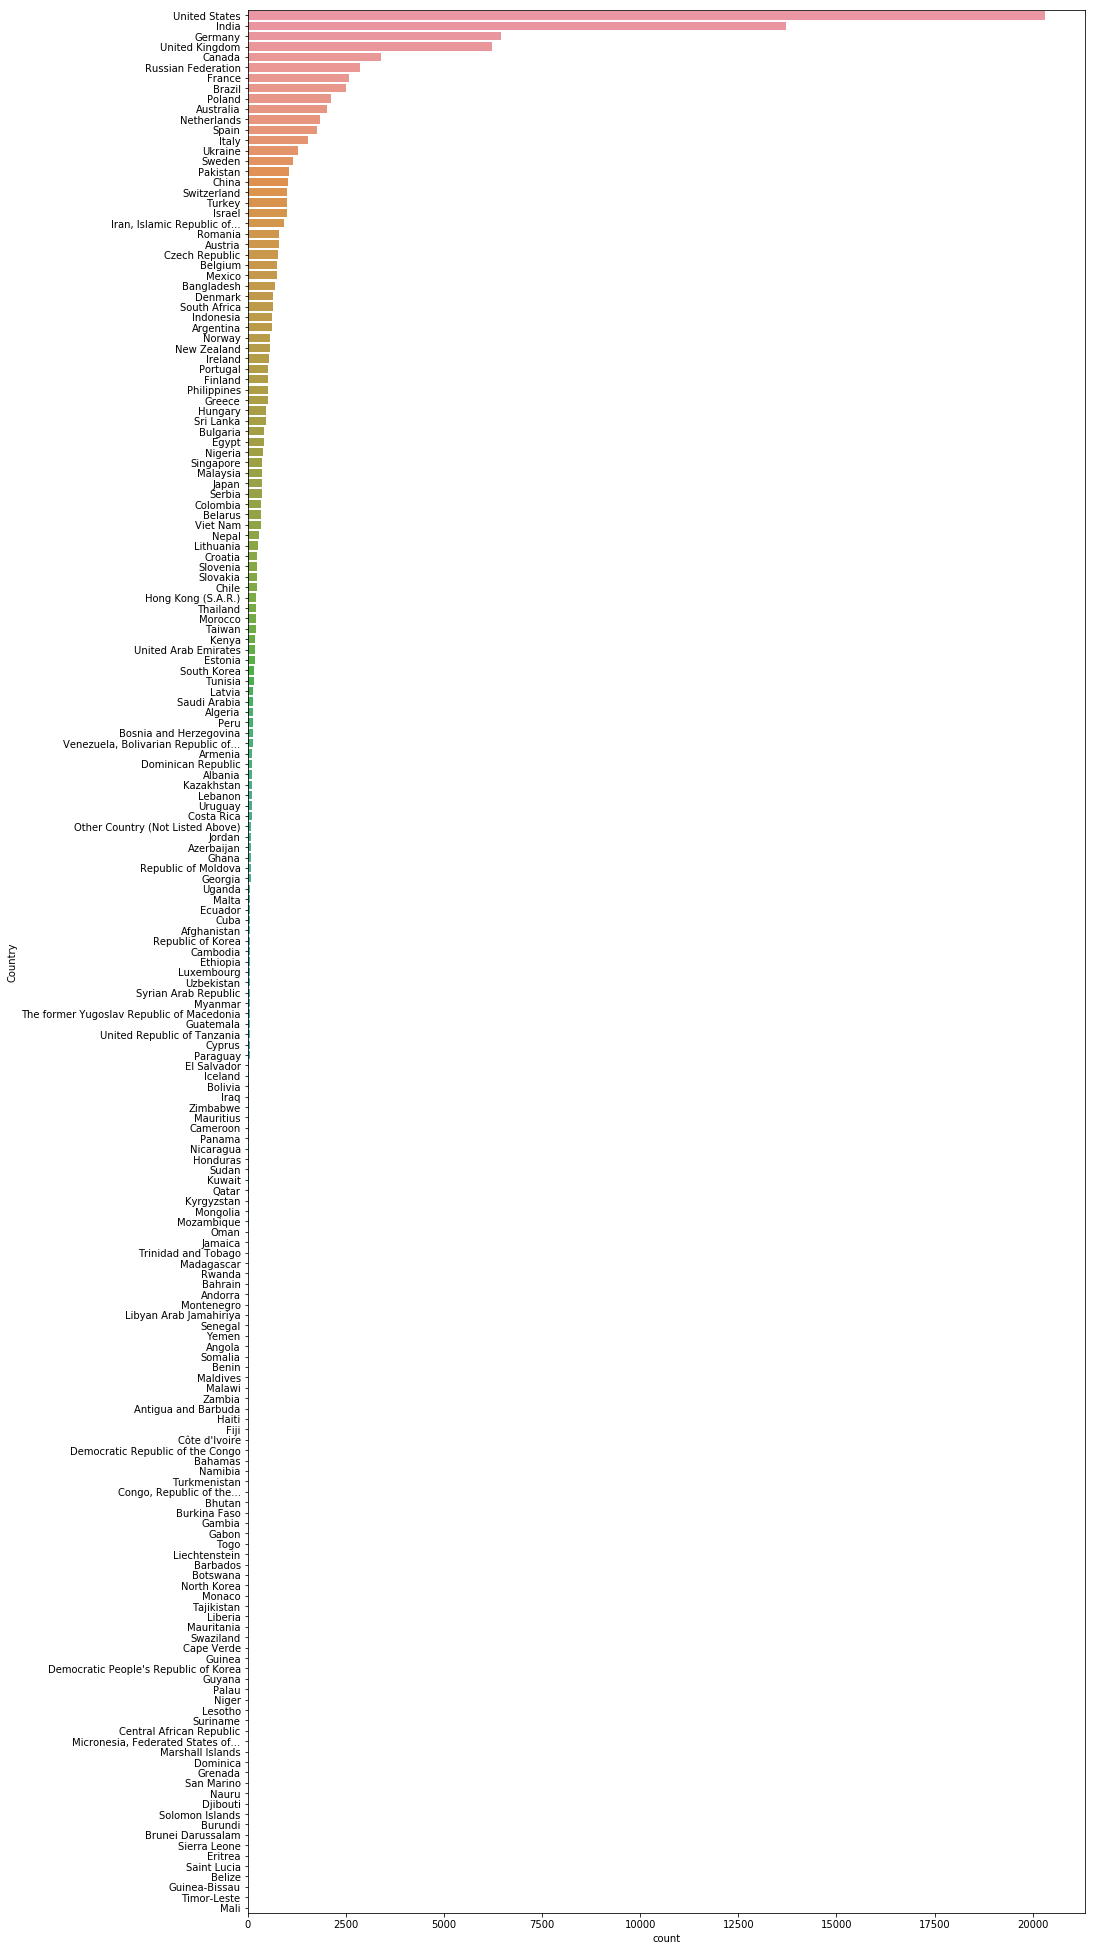

In [3]:
# see how user are disturbuted across geography
plt.subplots(figsize=(15,35))
sns.countplot(y = survey.Country, order = survey.Country.value_counts().index)

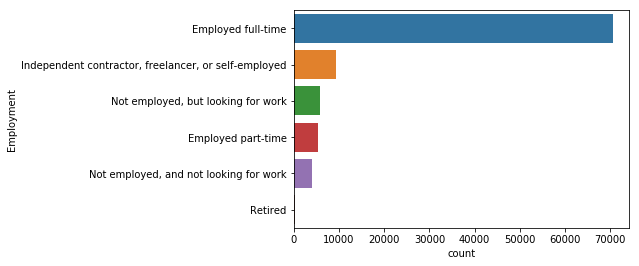

In [4]:
# ploting employment status count of Users 
survey.Employment.unique()
sns.countplot(y=survey.Employment, order = survey.Employment.value_counts().index)

In [5]:
# Create a list of Dev Type by spliting the DevType from dataframe
from collections import Counter
DevType = []
temp = survey.DevType.drop(survey.loc[survey.DevType.isnull()].index)
for i in temp:
    if i is not None:
        types = i.replace(' ', '').split(";")
        DevType.extend(types)
print(Counter(DevType))

Counter({'Back-enddeveloper': 53300, 'Full-stackdeveloper': 44353, 'Front-enddeveloper': 34822, 'Mobiledeveloper': 18804, 'Desktoporenterpriseapplicationsdeveloper': 15807, 'Student': 15732, 'Databaseadministrator': 13216, 'Designer': 12019, 'Systemadministrator': 10375, 'DevOpsspecialist': 9549, 'Dataorbusinessanalyst': 7559, 'Datascientistormachinelearningspecialist': 7088, 'QAortestdeveloper': 6194, 'Engineeringmanager': 5256, 'Embeddedapplicationsordevicesdeveloper': 4819, 'Gameorgraphicsdeveloper': 4642, 'Productmanager': 4316, 'Educatororacademicresearcher': 3641, 'C-suiteexecutive(CEO,CTO,etc.)': 3491, 'Marketingorsalesprofessional': 1122})


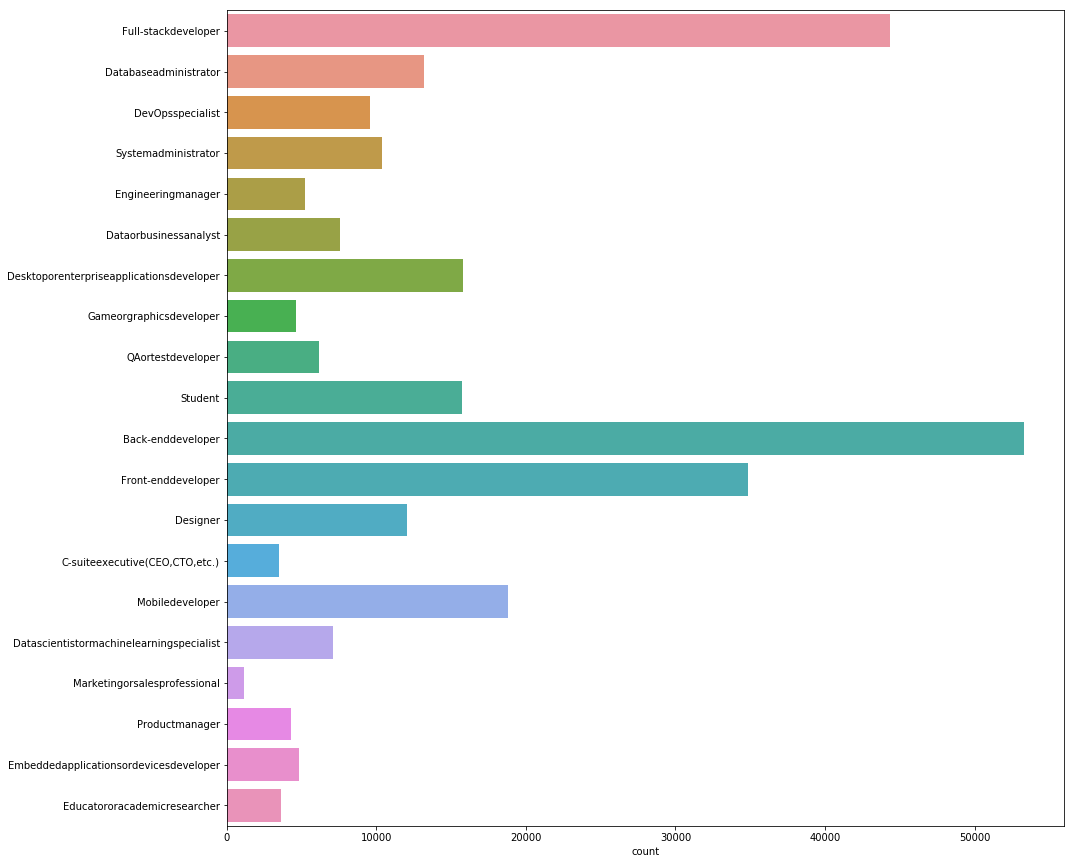

In [6]:
plt.subplots(figsize=(15,15))   
sns.countplot(y = DevType)

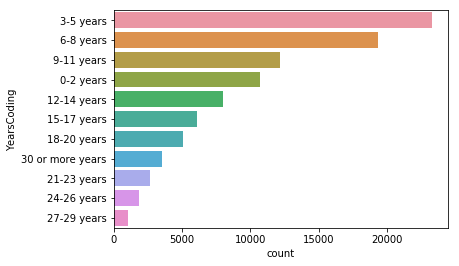

In [7]:
survey.YearsCoding.unique()
sns.countplot(y = survey.YearsCoding, order = survey.YearsCoding.value_counts().index)

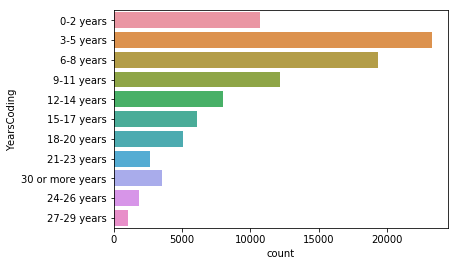

In [8]:
survey.YearsCodingProf.unique()
sns.countplot(y = survey.YearsCoding, order = survey.YearsCodingProf.value_counts().index)

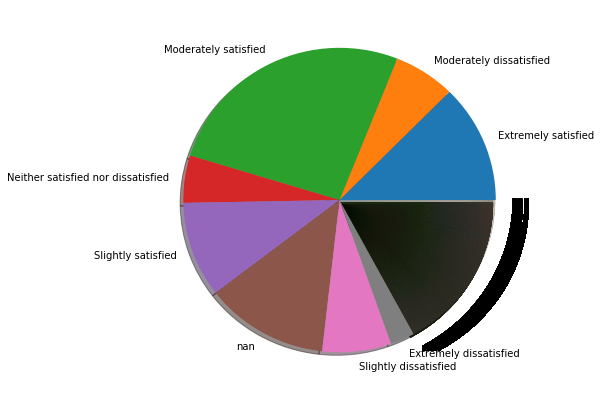

In [9]:
plt.subplots(figsize=(7,7))  
plt.pie(dict(Counter(survey.JobSatisfaction)).values(),
        labels = dict(Counter(survey.JobSatisfaction)).keys(),
        shadow = True,
        startangle = 0);

In [10]:
# Data Cleaning by removing all the null entry.
temp = survey.LanguageWorkedWith.drop(survey.loc[survey.LanguageWorkedWith.isnull()].index)

# Create a list of user with language used fr0m survey.
languages = []
row = {}
for i in temp:
    if i is not None: 
        types = i.split(";")
        languages.extend(types)
popularLanguages = Counter(languages).most_common(20)

languages = [i[0] for i in popularLanguages]
lang_count = [i[1] for i in popularLanguages]

# Creating a dataframe to plot.
df = pd.DataFrame()
df['Languages'] = languages
df['Number_of_Users'] = lang_count
df.head(20)     

,Languages,Number_of_Users
0,JavaScript,54686
1,HTML,53628
2,CSS,50979
3,SQL,44670
4,Java,35521
5,Bash/Shell,31172
6,Python,30359
7,C#,26954
8,PHP,24071
9,C++,19872


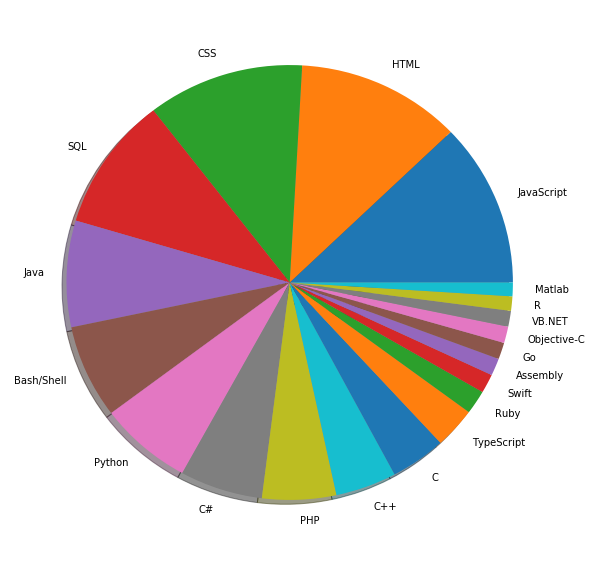

In [11]:
plt.subplots(figsize=(10,10))  
plt.pie(df.Number_of_Users,
        labels = df.Languages,
        shadow = True,
        startangle = 0);

In [12]:
# Data Cleaning by removing all the null entry.
temp = survey.LanguageDesireNextYear.drop(survey.loc[survey.LanguageDesireNextYear.isnull()].index)
languages = []
row = {}
for i in temp:
    if i is not None: 
        types = i.split(";")
        languages.extend(types)
popularLanguages = Counter(languages).most_common(20)

languages = [i[0] for i in popularLanguages]
lang_count = [i[1] for i in popularLanguages]

df = pd.DataFrame()
df['Languages'] = languages
df['Number_of_Users'] = lang_count
df.head(20)

,Languages,Number_of_Users
0,JavaScript,38465
1,Python,32795
2,HTML,31789
3,CSS,30199
4,SQL,28011
5,Java,22556
6,Bash/Shell,20751
7,C#,20419
8,TypeScript,16896
9,Go,15529


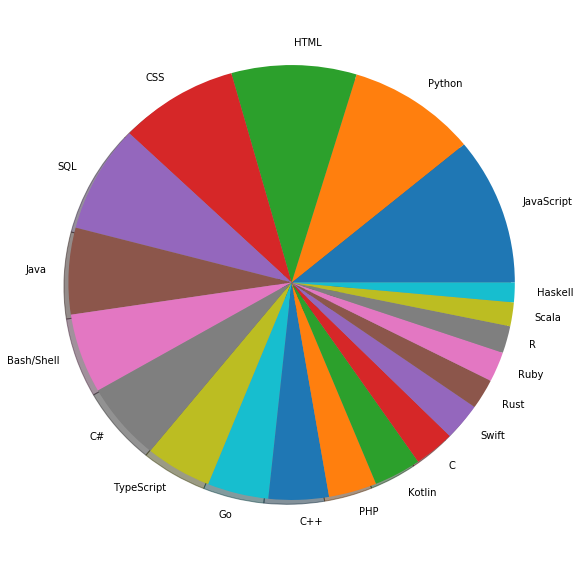

In [13]:
plt.subplots(figsize=(10,10))  
plt.pie(df.Number_of_Users,
        labels = df.Languages,
        shadow = True,
        startangle = 0);

In [14]:
# Data Cleaning by removing all the null entry.
temp = survey.IDE.drop(survey.loc[survey.IDE.isnull()].index)
IDE = []
row = {}
for i in temp:
    if i is not None: 
        types = i.split(";")
        IDE.extend(types)
popularIDE = Counter(IDE).most_common(20)

IDE = [i[0] for i in popularIDE]
lang_count = [i[1] for i in popularIDE]

df = pd.DataFrame()
df['IDE'] = IDE
df['Number_of_Users'] = lang_count
df.head(20)

,IDE,Number_of_Users
0,Visual Studio Code,26280
1,Visual Studio,25870
2,Notepad++,25755
3,Sublime Text,21810
4,Vim,19477
5,IntelliJ,18765
6,Android Studio,14558
7,Eclipse,14213
8,Atom,13576
9,PyCharm,9027


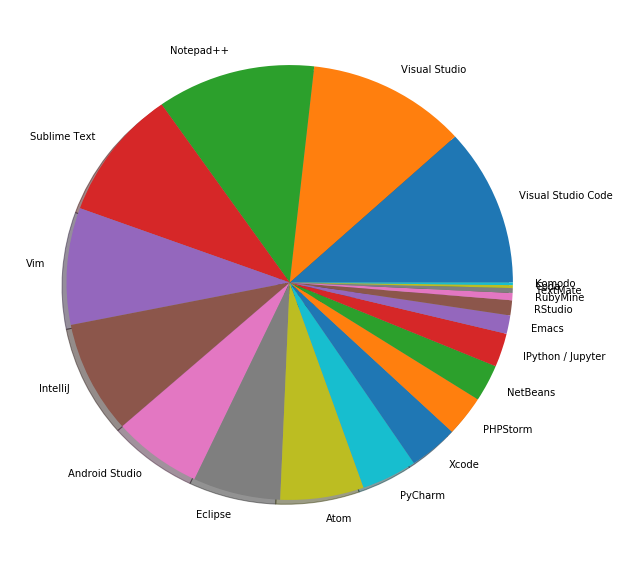

In [15]:
plt.subplots(figsize=(10,10))  
plt.pie(df.Number_of_Users,
        labels = df.IDE,
        shadow = True,
        startangle = 0);

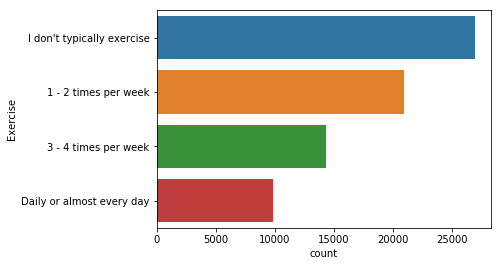

In [16]:
survey.Exercise.unique()
sns.countplot(y = survey.Exercise, order = survey.Exercise.value_counts().index)

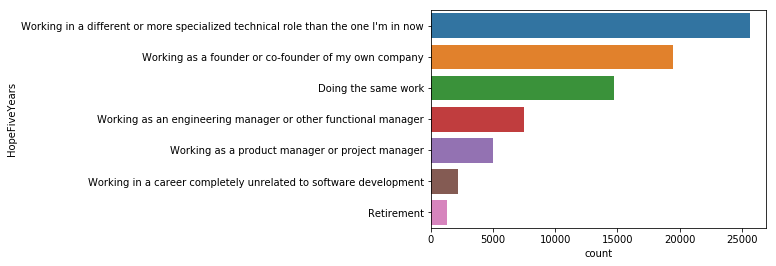

In [17]:
# Data Cleaning by removing all the na entry.
NextFiveYears = survey.HopeFiveYears.dropna()
sns.countplot(y =NextFiveYears, order = NextFiveYears.value_counts().index)